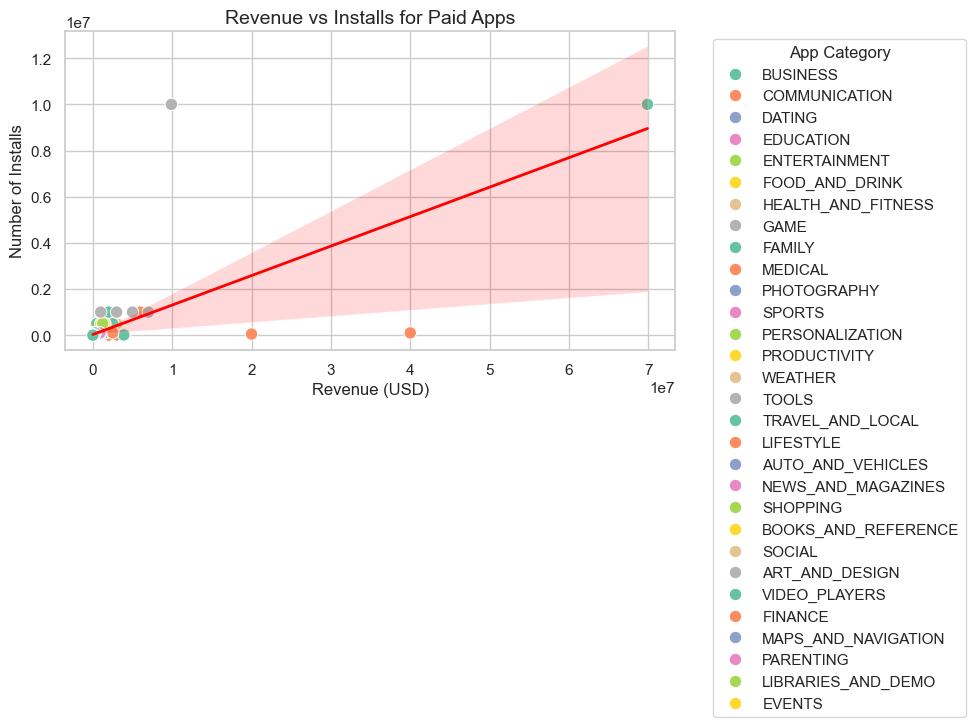

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("googleplaystore.csv")
df.columns = [col.strip() for col in df.columns]

# Keep only Paid apps
df = df[df['Type'] == 'Paid']

# Drop rows with missing values in key columns
df = df.dropna(subset=['Installs', 'Price', 'Category'])

# Convert Installs to numeric
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
df = df[df['Installs'].str.isnumeric()]  # keep only numeric installs
df['Installs'] = df['Installs'].astype(float)

# Convert Price to numeric (remove $ and ensure numeric)
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df = df[df['Price'].str.replace('.', '', 1).str.isnumeric()]  # keep only numeric prices
df['Price'] = df['Price'].astype(float)

# Calculate Revenue
df['Revenue'] = df['Installs'] * df['Price']

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(
    data=df,
    x='Revenue',
    y='Installs',
    hue='Category',
    palette='Set2',
    s=80
)

sns.regplot(
    data=df,
    x='Revenue',
    y='Installs',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2, "label": "Trendline"}
)

plt.title("Revenue vs Installs for Paid Apps", fontsize=14)
plt.xlabel("Revenue (USD)")
plt.ylabel("Number of Installs")
plt.legend(title="App Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
